# Комп'ютерне моделювання задач прикладної математики

## Динамічні системи. 

###  Лабораторна робота 4 Реакційно-дифузійні системи та їх застосування

***Студентка Пороскун Олена. Група ПМ.м-21***

Варіант 8

*Task 1 Розподіл температури по пластині.* 

**Постановка задачi**

*Дано*

* Прямокутна пластина зi сталим коефiцiєнтом температуропровiдностi D.
* Задано початковий розподiл температури T = T (x, y), потужнiсть Wi та координати (xi, yi)
джерел тепла. 

*Задача*

Проаналiзувати змiну температури рiзних точок пластини з часом

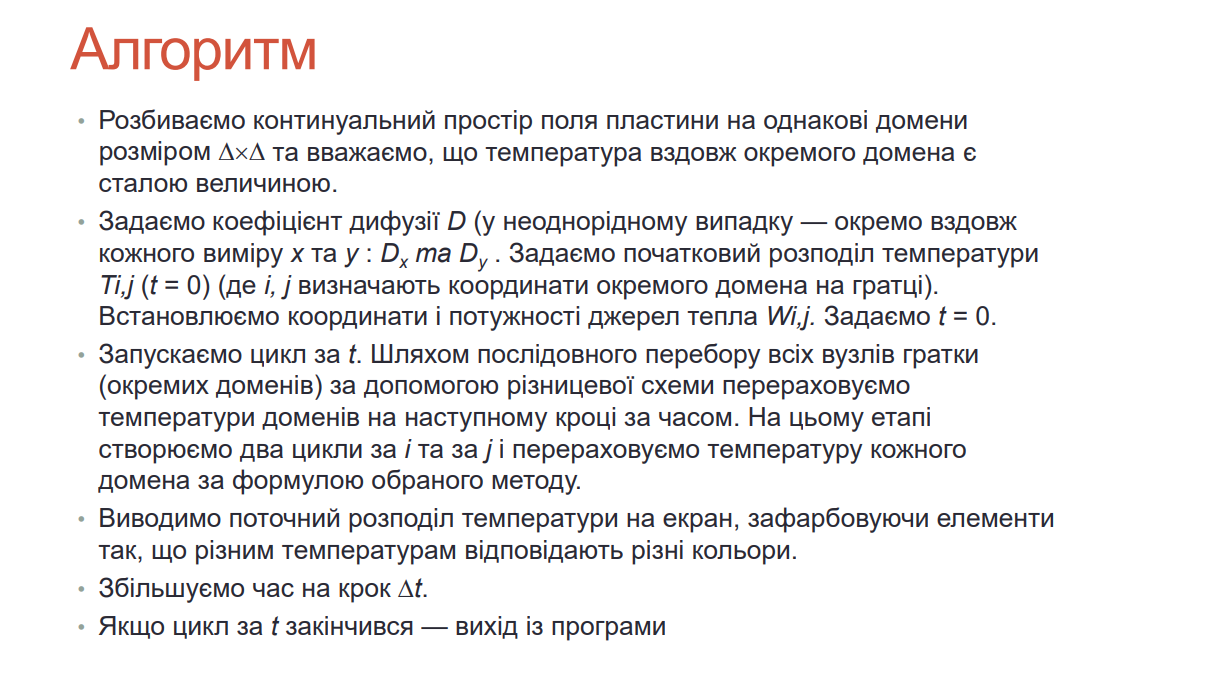

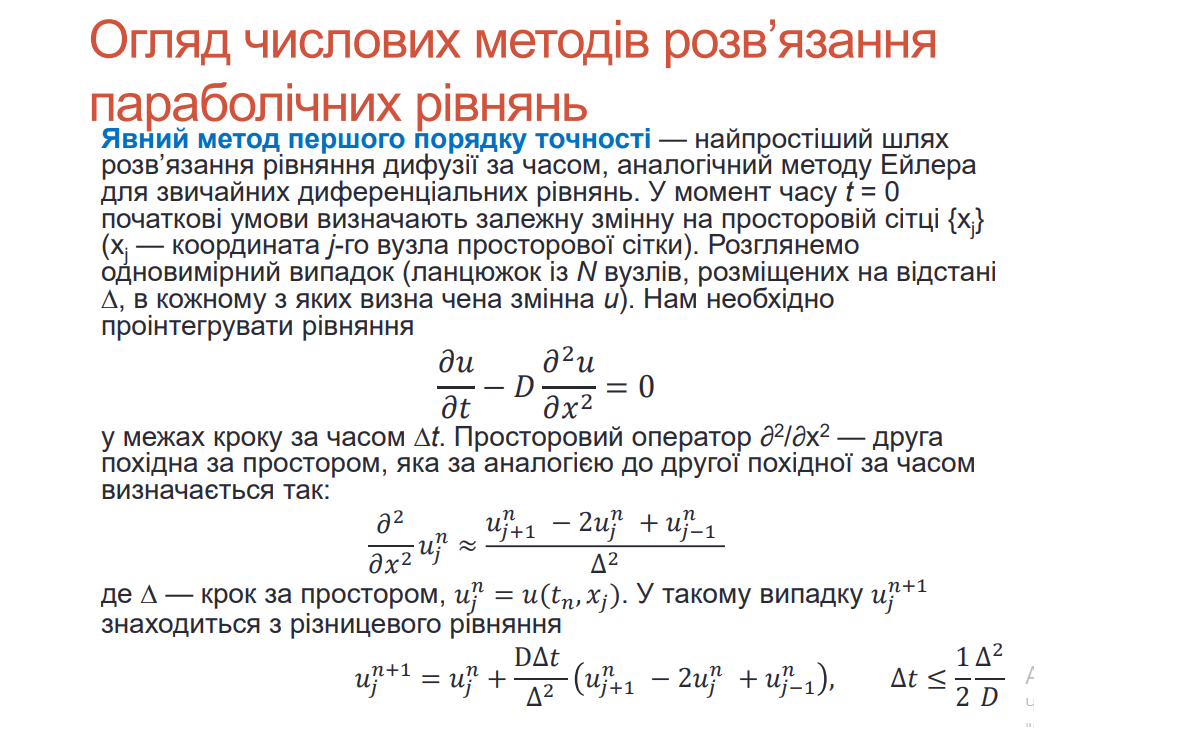

**Умова**

$ 
D -  сталий \ коефiцiєнт \ температуропровiдностi \ (коефiцiєнт \ дифузiї)  \\ 
T = T(x,y) -  початковий \ розподiл \ температури  \\ 
Wi - потужнiсть  \\ 
\Delta х \Delta - \ розмiри \ пластини 
$

**Р-ня**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
#D = 2.8*(10**(-6))
D = 0.17 # 70 
Delta1 = 50
W = 25
wi = [25,26,27,28,29,30] # номери координат з потужністю W
wj = wi
t0 = 20

In [3]:
def fun_init_Temp(Delta, wi, wj, W, t0=20):
    T_starts = np.zeros((Delta, Delta))
    for i in range(Delta):
        for j in range(Delta):
            T_starts[i,j] = t0
            if (i in wi) & (j in wj):
                T_starts[i,j] = W
    return T_starts

In [4]:
def plot_map(Temp):
    # Make plot with vertical (default) colorbar
    fig, ax = plt.subplots()

    data = Temp
    
    cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
    ax.set_title('Теплова карта температури пластини ') # with vertical colorbar
    cbar = fig.colorbar(cax)
    #plt.show()

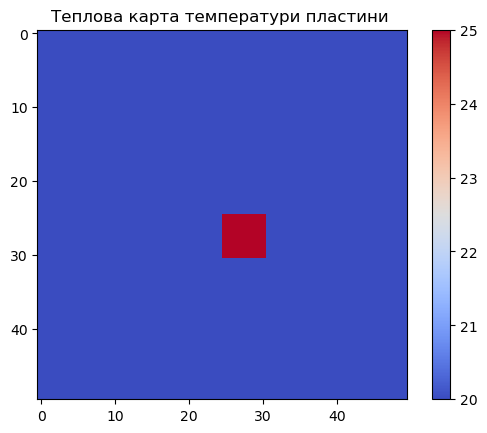

In [5]:
Temp_0 = fun_init_Temp(Delta1, wi, wj, W, t0)
plot_map(Temp_0)

In [6]:
times = np.linspace(0, 40, 1000)
times = np.round(times,4)
delta_t = times[1]-times[0]
delta_t

0.04

In [7]:
0.5*(Delta1**2 / D)

7352.941176470587

In [8]:
delta_t < (0.5*(Delta1**2 / D))

True

* **Без джерела температури**

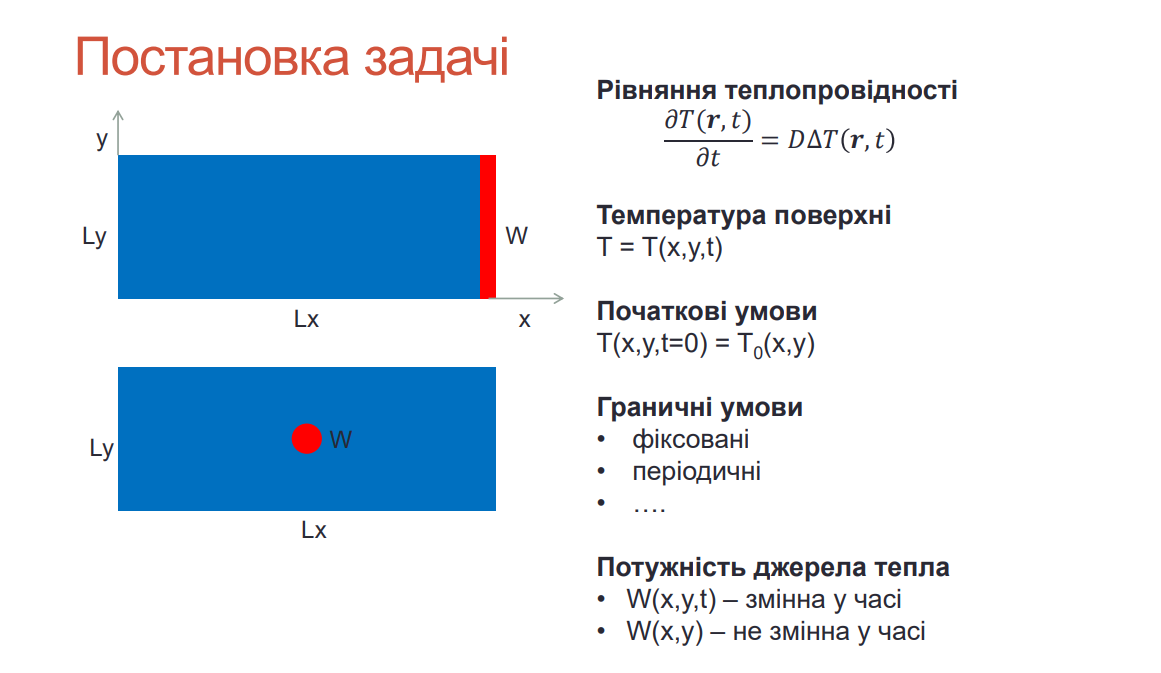

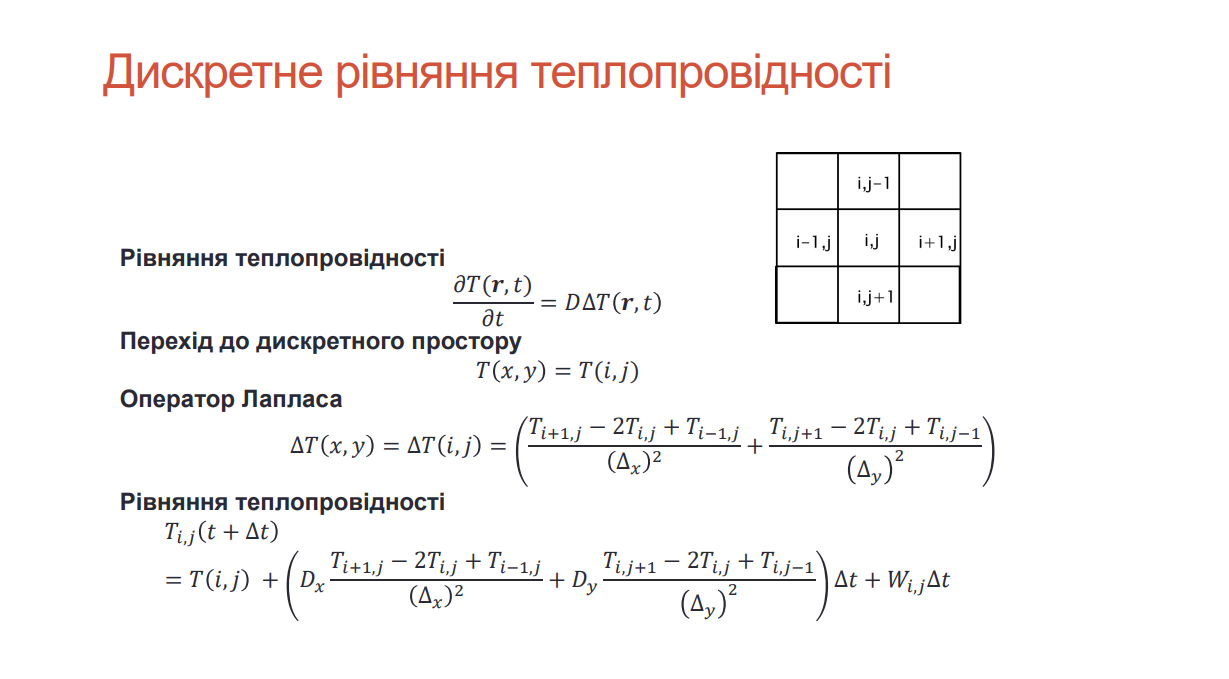

*Візьмемо формулу з рівняння теплопровідності.*

In [9]:
#'''
def fun_temp_change(D, Delta, T_start, delta_t, W):
    print('t0 =', t0, '\t - початкова температура пластини крім нагрітої частини')
    print('D =', D, '\t  - коефiцiєнт дифузiї')
    print('Delta =', Delta, '\t  - пластина розміром Delta х Delta')
    print('delta_t =', delta_t, '\t  - крок по часу')
    print('W =', W, '\t  - потужність(для частини пластини, де нагріваємо)')
    t_ = 0
    time = []
    T_mean = []
    T = np.empty((Delta, Delta))
    while(t_ < 40):
        if (t_ == 0):
            T =  T_start.copy()
        # граничні умови (фіксовані):
        # тому рамка з 1 стовчика, 1 рядка, останього стовпчика та рядка - не змінюється    
        for i in range(1, Delta-1):
            for j in range(1, Delta-1):
                #T[i,j] = T[i,j] + (D*delta_t/(Delta**2))*(T[i, j+1] - 2*T[i,j] + T[i, j-1])  
                # р-ня теплоємності
                T[i,j] = T[i,j] + (D/(Delta**2)) * ((T[i+1,j] - 2* T[i,j] + T[i-1,j]) + \
                          (T[i,j+1]-2*T[i,j]+T[i,j-1])) * delta_t + W*delta_t
        t_ += delta_t  
        t_ = round(t_, 5)
        time.append(t_)
        T_mean.append(np.mean(T))
    #print(t_)
    return time, T, T_mean
#'''

In [10]:
#time1 = []
#T1 = []
#T_mean1 = []
time1, T1, T_mean1 = fun_temp_change(D, Delta1, Temp_0, delta_t, W)

t0 = 20 	 - початкова температура пластини крім нагрітої частини
D = 0.17 	  - коефiцiєнт дифузiї
Delta = 50 	  - пластина розміром Delta х Delta
delta_t = 0.04 	  - крок по часу
W = 25 	  - потужність(для частини пластини, де нагріваємо)


Text(0, 0.5, 'mean(Temperature)')

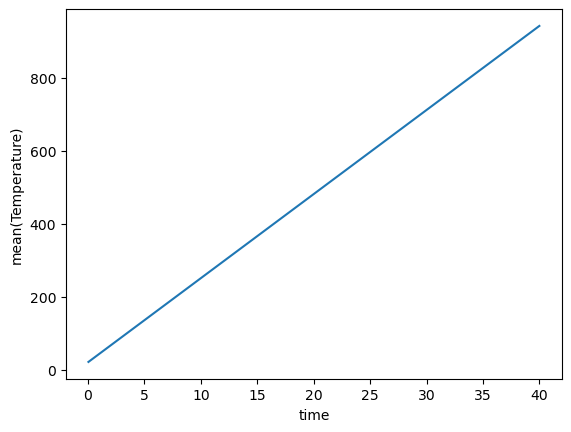

In [11]:
plt.plot(time1, T_mean1)
plt.xlabel('time')
plt.ylabel('mean(Temperature)')

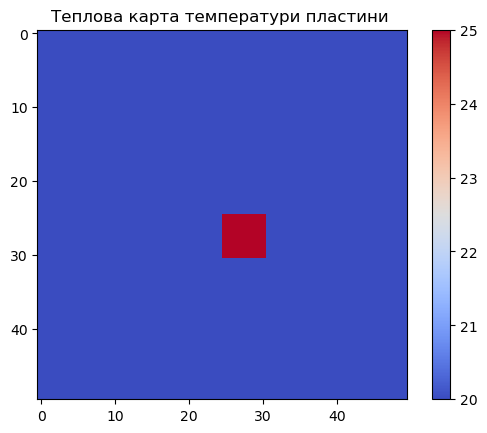

In [12]:
#Temp_0 = fun_init_Temp(Delta1, wi, wj, W)
plot_map(Temp_0)

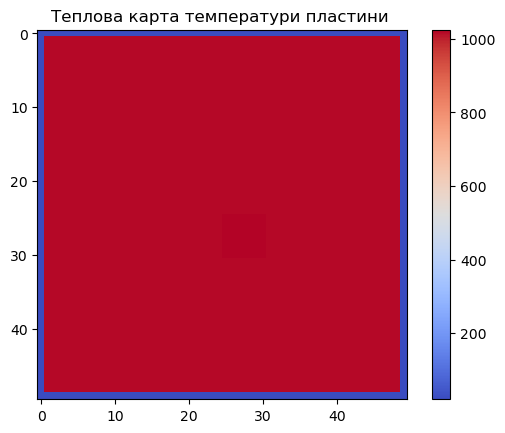

In [13]:
plot_map(T1)

*Візьмемо формулу для комірки, що дорівнює середньому по сусідам.*

In [14]:
#'''
def fun_temp_change_avr(D, Delta, T_start, delta_t, W):
    print('t0 =', t0, '\t - початкова температура пластини крім нагрітої частини')
    print('D =', D, '\t  - коефiцiєнт дифузiї')
    print('Delta =', Delta, '\t  - пластина розміром Delta х Delta')
    print('delta_t =', delta_t, '\t  - крок по часу')
    print('W =', W, '\t  - потужність(для частини пластини, де нагріваємо)')
    t_ = 0
    time = []
    T_mean = []
    T = np.empty((Delta, Delta))
    while(t_ < 40):
        if (t_ == 0):
            T =  T_start.copy()
        # граничні умови (фіксовані):
        # тому рамка з 1 стовчика, 1 рядка, останього стовпчика та рядка - не змінюється    
        for i in range(1, Delta-1):
            for j in range(1, Delta-1):
                #T[i,j] = T[i,j] + (D*delta_t/(Delta**2))*(T[i, j+1] - 2*T[i,j] + T[i, j-1])  
                # р-ня теплоємності
                #T[i,j] = T[i,j] + (D/(Delta**2)) * ((T[i+1,j] - 2* T[i,j] + T[i-1,j]) + \
                #          (T[i,j+1]-2*T[i,j]+T[i,j-1])) * delta_t + W*delta_t
                # просто середнє по сусідам комірки
                T[i,j] = (T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1])/4
        t_ += delta_t  
        t_ = round(t_, 5)
        time.append(t_)
        T_mean.append(np.mean(T))
    #print(t_)
    return time, T, T_mean
#'''

In [15]:
time1_avr, T1_avr, T_mean1_avr = fun_temp_change_avr(D, Delta1, Temp_0, delta_t, W)

t0 = 20 	 - початкова температура пластини крім нагрітої частини
D = 0.17 	  - коефiцiєнт дифузiї
Delta = 50 	  - пластина розміром Delta х Delta
delta_t = 0.04 	  - крок по часу
W = 25 	  - потужність(для частини пластини, де нагріваємо)


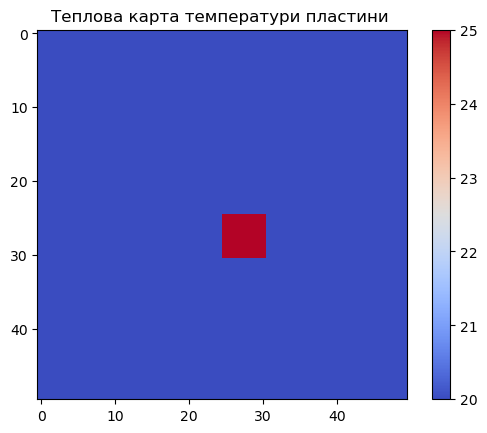

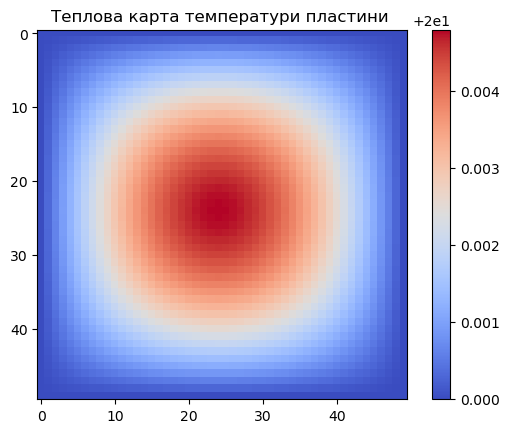

In [16]:
plot_map(Temp_0)
plot_map(T1_avr)

Text(0, 0.5, 'mean(Temperature)')

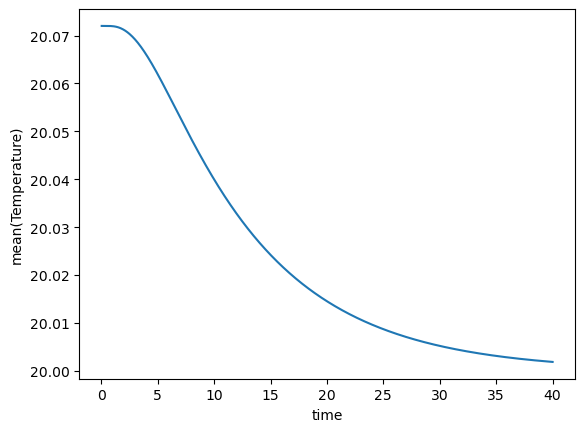

In [17]:
plt.plot(time1_avr, T_mean1_avr)
plt.xlabel('time')
plt.ylabel('mean(Temperature)')

* **З постійним джерелом температури**

*Візьмемо формулу з рівняння теплопровідності.*

In [18]:
def fun_temp_change_W(D = 5, Delta=10, T_start=[0], delta_t=0.01, W=5, wi=5):
    print('t0 =', t0, '\t - початкова температура пластини крім нагрітої частини')
    print('D =', D, '\t  - коефiцiєнт дифузiї')
    print('Delta =', Delta, '\t  - пластина розміром Delta х Delta')
    print('delta_t =', delta_t, '\t  - крок по часу')
    print('W =', W, '\t  - потужність(для частини пластини, де нагріваємо)')
    
    t_ = 0
    time = []
    T_mean = []
    T = np.empty((Delta, Delta))
    
    T = T_start.copy()
    t_ += delta_t
    
    wi = wj
    while(t_ <= 40):
        # граничні умови (фіксовані): 
        # тому рамка з 1 стовчика, 1 рядка, останього стовпчика та рядка - не змінюється
        for i in range(1, Delta-1):
            for j in range(1, Delta-1):
                if (i in wi) & (j in wj):
                    T[i,j] = W
                else:    
                    #T[i,j] = T[i,j] + (D*delta_t/(Delta**2))*(T[i, j+1] - 2*T[i,j] + T[i, j-1]) 
                    # р-ня теплоємності
                    T[i,j] = T[i,j] + (D/(Delta**2)) * ((T[i+1,j] - 2* T[i,j] + T[i-1,j]) + \
                          (T[i,j+1]-2*T[i,j]+T[i,j-1])) * delta_t + W*delta_t
                    # просто середнє по сусідам комірки
                    #T[i,j] = (T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1])/4
                    
        t_ += delta_t
        t_ = np.round(t_,5)
        time.append(t_)
        T_mean.append(np.mean(T))
    return time, T, T_mean

t0 = 20 	 - початкова температура пластини крім нагрітої частини
D = 0.17 	  - коефiцiєнт дифузiї
Delta = 50 	  - пластина розміром Delta х Delta
delta_t = 0.04 	  - крок по часу
W = 25 	  - потужність(для частини пластини, де нагріваємо)


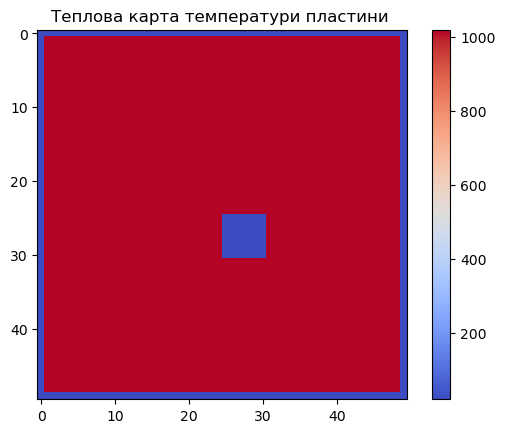

In [19]:
time_w, T_w, T_mean_w = fun_temp_change_W(D, Delta1, Temp_0, delta_t, W, wi)
plot_map(T_w)

Text(0, 0.5, 'mean(Temperature)')

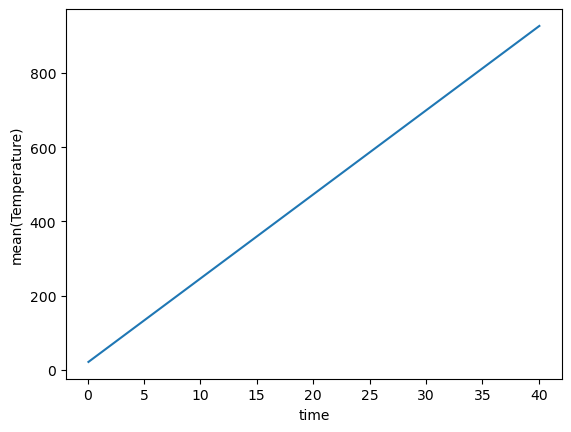

In [20]:
plt.plot(time_w, T_mean_w)
plt.xlabel('time')
plt.ylabel('mean(Temperature)')

*Візьмемо формулу для комірки, що дорівнює середньому по сусідам.*

In [21]:
def fun_temp_change_W_avr(D = 5, Delta=10, T_start=[0], delta_t=0.01, W=5, wi=5):
    print('t0 =', t0, '\t - початкова температура пластини крім нагрітої частини')
    print('D =', D, '\t  - коефiцiєнт дифузiї')
    print('Delta =', Delta, '\t  - пластина розміром Delta х Delta')
    print('delta_t =', delta_t, '\t  - крок по часу')
    print('W =', W, '\t  - потужність(для частини пластини, де нагріваємо)')
    
    t_ = 0
    time = []
    T_mean = []
    T = np.empty((Delta, Delta))
    
    T = T_start.copy()
    t_ += delta_t
    
    wi = wj
    while(t_ <= 40):
        # граничні умови (фіксовані): 
        # тому рамка з 1 стовчика, 1 рядка, останього стовпчика та рядка - не змінюється
        for i in range(1, Delta-1):
            for j in range(1, Delta-1):
                if (i in wi) & (j in wj):
                    T[i,j] = W
                else:    
                    #T[i,j] = T[i,j] + (D*delta_t/(Delta**2))*(T[i, j+1] - 2*T[i,j] + T[i, j-1]) 
                    # р-ня теплоємності
                    #T[i,j] = T[i,j] + (D/(Delta**2)) * ((T[i+1,j] - 2* T[i,j] + T[i-1,j]) + \
                    #      (T[i,j+1]-2*T[i,j]+T[i,j-1])) * delta_t + W*delta_t
                    # просто середнє по сусідам комірки
                    T[i,j] = (T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1])/4
                    
        t_ += delta_t
        t_ = np.round(t_,5)
        time.append(t_)
        T_mean.append(np.mean(T))
    return time, T, T_mean

t0 = 20 	 - початкова температура пластини крім нагрітої частини
D = 0.17 	  - коефiцiєнт дифузiї
Delta = 50 	  - пластина розміром Delta х Delta
delta_t = 0.04 	  - крок по часу
W = 25 	  - потужність(для частини пластини, де нагріваємо)


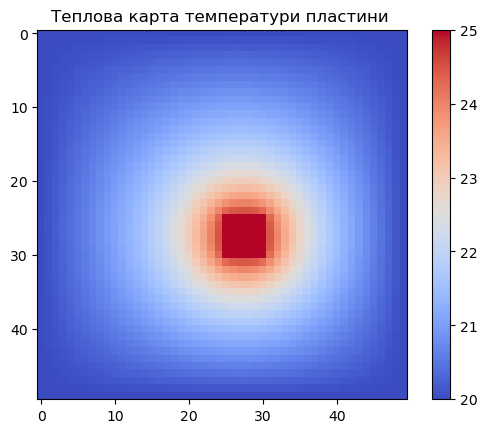

In [22]:
time_w_avr, T_w_avr, T_mean_w_avr = fun_temp_change_W_avr(D, Delta1, Temp_0, delta_t, W, wi)
plot_map(T_w_avr)

Text(0, 0.5, 'mean(Temperature)')

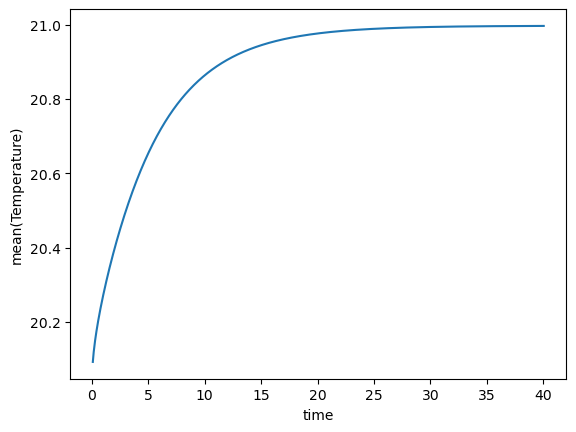

In [23]:
plt.plot(time_w_avr, T_mean_w_avr)
plt.xlabel('time')
plt.ylabel('mean(Temperature)')